The dataset is 'Participant-08'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Connecting to my google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the csv file.

In [3]:
P8_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-08.csv", sep=",")
P8_data #There should be a variable to storage data read from the csv file.

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


Drop none values.

In [4]:
P8_data = P8_data.dropna()
P8_data

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


In [16]:
P8_data.sort_values(by='Start')
P8_data

,Start,Finish,Steps (count)
2160,01-Apr-2022 00:00,01-Apr-2022 01:00,0.0
2161,01-Apr-2022 01:00,01-Apr-2022 02:00,0.0
2162,01-Apr-2022 02:00,01-Apr-2022 03:00,0.0
2163,01-Apr-2022 03:00,01-Apr-2022 04:00,0.0
2164,01-Apr-2022 04:00,01-Apr-2022 05:00,0.0
...,...,...,...
3620,31-May-2022 19:00,31-May-2022 20:00,96.0
3621,31-May-2022 20:00,31-May-2022 21:00,19.0
3622,31-May-2022 21:00,31-May-2022 22:00,0.0
3623,31-May-2022 22:00,31-May-2022 23:00,0.0


The time data in the file is complex, it includes year, month, day and time. So I want to seperate that and analysis the data distribution separately.

Create new columns to store seperated data.

In [50]:
P8_data.insert(0,'Time','')
P8_data.insert(0,'Month','')
P8_data.insert(0,'Day','')

We can extract keywords by index method.

In [39]:
for n in range(0,len(P8_data)):
  P8_data['Time'][n] = P8_data['Start'][n][-6:-3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
for n in range(0,len(P8_data)):
  P8_data['Month'][n] = P8_data['Start'][n][3:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
for n in range(0,len(P8_data)):
  P8_data['Day'][n] = P8_data['Start'][n][0:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
P8_data

,Day,Month,Time,Start,Finish,Steps (count)
2160,01,Apr,00,01-Apr-2022 00:00,01-Apr-2022 01:00,0.0
2161,01,Apr,01,01-Apr-2022 01:00,01-Apr-2022 02:00,0.0
2162,01,Apr,02,01-Apr-2022 02:00,01-Apr-2022 03:00,0.0
2163,01,Apr,03,01-Apr-2022 03:00,01-Apr-2022 04:00,0.0
2164,01,Apr,04,01-Apr-2022 04:00,01-Apr-2022 05:00,0.0
...,...,...,...,...,...,...
3620,31,May,19,31-May-2022 19:00,31-May-2022 20:00,96.0
3621,31,May,20,31-May-2022 20:00,31-May-2022 21:00,19.0
3622,31,May,21,31-May-2022 21:00,31-May-2022 22:00,0.0
3623,31,May,22,31-May-2022 22:00,31-May-2022 23:00,0.0


Output data should be integer, steps data should not in float.

In [62]:
round(P8_data.groupby('Time')['Steps (count)'].sum())

Time
 00        16.0
 01        38.0
 02        52.0
 03       146.0
 04      1249.0
 05     15275.0
 06     34385.0
 07    122440.0
 08    223748.0
 09    188612.0
 10    177229.0
 11    196049.0
 12    162981.0
 13    105001.0
 14    155007.0
 15    225315.0
 16    242797.0
 17    135174.0
 18    101897.0
 19     72405.0
 20     30600.0
 21     13329.0
 22      3840.0
 23        91.0
Name: Steps (count), dtype: float64

Plot the graph with time and steps.

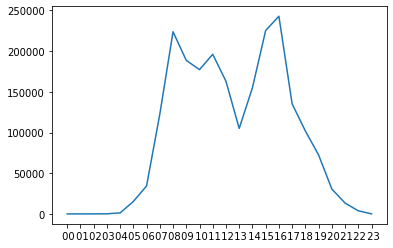

In [63]:
plt.plot(round(P8_data.groupby('Time')['Steps (count)'].sum()))

In [57]:
P8_data.groupby('Month')['Steps (count)'].sum()

Month
Apr    262138.0
Aug    297977.0
Feb    245087.0
Jan    213809.0
Jul    265860.0
Jun    225710.0
Mar    264200.0
May    299847.0
Sep    133050.0
Name: Steps (count), dtype: float64

Plot the graph with month and steps.

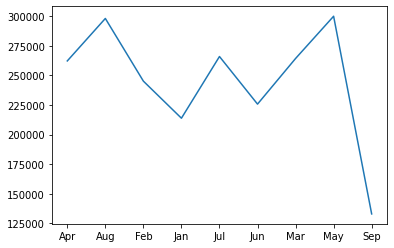

In [61]:
plt.plot(P8_data.groupby('Month')['Steps (count)'].sum())

In [60]:
P8_data.groupby('Day')['Steps (count)'].sum()

Day
01    69789.0
02    69997.0
03    61183.0
04    69107.0
05    69270.0
06    79021.0
07    74899.0
08    78978.0
09    93381.0
10    91694.0
11    64454.0
12    65007.0
13    69288.0
14    62077.0
15    70229.0
16    77937.0
17    69285.0
18    66947.0
19    72356.0
20    79688.0
21    77614.0
22    74364.0
23    70527.0
24    61776.0
25    72476.0
26    80998.0
27    77753.0
28    66079.0
29    62515.0
30    57175.0
31    51814.0
Name: Steps (count), dtype: float64

Plot the graph with days and steps.

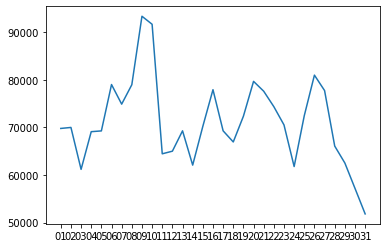

In [59]:
plt.plot(P8_data.groupby('Day')['Steps (count)'].sum())